In [0]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
DATADIR = "/content/drive/My Drive/images_classifi/images"
CATEGORIES = ["not emp", "emp"]

20191005_215947642_iOS.jpg


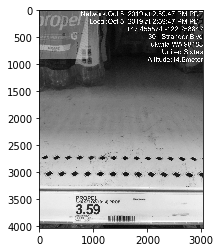

In [13]:
for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    print(img)
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap ="gray")
    plt.show()
    break
  break

In [14]:
print(img_array.shape)

(4032, 3024)


In [15]:
path

'/content/drive/My Drive/images_classifi/images/not emp'

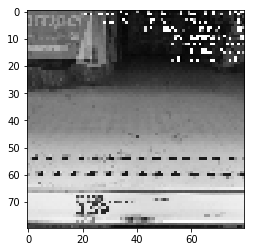

In [16]:
IMG_SIZE = 80
new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap="gray")
plt.show()

In [0]:
training_data = []
def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

create_training_data()

In [18]:
print(len(training_data))

201


In [0]:
import random
random.shuffle(training_data)

In [20]:
for sample in training_data:
  print(sample[1])

0
0
0
1
1
0
0
1
1
0
1
1
0
1
1
0
0
0
1
1
0
1
0
1
0
0
1
0
0
1
1
1
0
1
1
0
0
1
0
1
1
0
1
1
1
1
1
0
0
0
1
1
1
1
0
1
0
0
0
0
0
0
1
1
0
1
0
0
1
0
0
1
0
0
1
0
0
1
1
1
1
0
1
0
1
1
0
1
1
1
1
1
0
1
0
1
1
1
1
0
0
1
1
0
0
0
1
1
1
1
0
1
0
0
1
0
1
1
1
1
1
0
0
1
1
1
0
1
1
0
0
1
1
0
0
0
1
0
1
0
1
1
0
0
1
1
0
0
1
1
1
0
0
1
1
0
1
1
1
1
0
1
1
0
0
0
1
0
0
0
1
0
1
0
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
1
1
1
0
0
1
0
1
0
0
1
1


In [0]:
X = []
y = []


In [0]:
for features, lables in training_data:
  X.append(features)
  y.append(lables)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [23]:
X.shape

(201, 80, 80, 1)

In [24]:
X[1].shape

(80, 80, 1)

In [25]:
np.array(y).shape

(201,)

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
X = X/80.0


model = Sequential()

model.add(  Conv2D(64,(3,3),input_shape = X.shape[1:])  )
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
model.fit(X,y,epochs=10, validation_split=0.3)




Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 140 samples, validate on 61 samples
Epoch 1/10
140/140 [==============================] - 3s 24ms/sample - loss: 2.8334 - acc: 0.5000 - val_loss: 1.0984 - val_acc: 0.6066
Epoch 2/10
140/140 [==============================] - 3s 18ms/sample - loss: 0.8187 - acc: 0.5500 - val_loss: 0.6848 - val_acc: 0.4590
Epoch 3/10
140/140 [==============================] - 3s 18ms/sample - loss: 0.5914 - acc: 0.7214 - val_loss: 0.7773 - val_acc: 0.4426
Epoch 4/10
140/140 [==============================] - 3s 18ms/sample - loss: 0.4947 - acc: 0.7714 - val_loss: 0.5969 - val_acc: 0.7049
Epoch 5/10
140/140 [==============================] - 3s 18ms/sample - loss: 0.3778 - acc: 0.8000 - val_loss: 0.6464 - val_acc: 0.7377
Epoch 6/10
140/140 [==============================] - 3s 18ms/sample - loss: 0.3644 - acc: 0.8286 - val_l

In [0]:
###new image###predicting###
img_array_new = cv2.imread('/content/images.jpg', cv2.IMREAD_GRAYSCALE)
print(img_array_new)
IMG_SIZE = 80
new_array_new = cv2.resize(img_array_new, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array_new, cmap ="gray")
plt.show()


In [0]:
ml = np.array(new_array_new).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [9]:
ml.shape

(1, 80, 80, 1)

In [0]:
n=model.predict(ml)

In [29]:
print(n)

[[0.]]


In [32]:
type(n)

numpy.ndarray

In [0]:
n1=int(n)

In [0]:
ab=[]
if n1==1:
  ab.append("It is empty")


In [62]:
len(ab)

0

In [0]:
import smtplib, ssl



In [0]:
if len(ab)==1:
  port = 587  # For starttls
  smtp_server = "smtp.gmail.com"
  sender_email = "satish99017@gmail.com"
  receiver_email = "daisyrhea1797@gmail.com"
  password = input("Type your password and press enter:")
  message = """\
Subject: Result

The self is empty."""

  context = ssl.create_default_context()
  with smtplib.SMTP(smtp_server, port) as server:
      server.ehlo()  # Can be omitted
      server.starttls(context=context)
      server.ehlo()  # Can be omitted
      server.login(sender_email, password)
      server.sendmail(sender_email, receiver_email, message)
    
  